<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/ExEDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Fetching the dataset
data=pd.read_csv("/content/drive/MyDrive/Retail_Business/Wholesale customers data.csv")

In [ ]:
# Display the first few rows
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [ ]:
print(data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [ ]:
# Checking for missing values
print(data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
# EDA: Mean, Median, Mode of Numerical Columns
numeric_data = data.select_dtypes(include=[np.number])

In [ ]:
# Mean
mean_values = numeric_data.mean()
# Median
median_values = numeric_data.median()
# Mode
mode_values = numeric_data.mode().iloc[0]

print(f"Mean:\n{mean_values}\n")
print(f"Median:\n{median_values}\n")
print(f"Mode:\n{mode_values}\n")

Mean:
Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

Median:
Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

Mode:
Channel               1.0
Region                3.0
Fresh                 3.0
Milk                577.0
Grocery             683.0
Frozen              133.0
Detergents_Paper      3.0
Delicassen            3.0
Name: 0, dtype: float64



In [ ]:
# Skewness and Kurtosis of Numeric columns
skewness = numeric_data.skew()
kurtosis = numeric_data.kurtosis()

print(f"Skewness:\n{skewness}\n")
print(f"Kurtosis:\n{kurtosis}\n")

Skewness:
Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

Kurtosis:
Channel              -1.427463
Region               -0.100111
Fresh                11.536408
Milk                 24.669398
Grocery              20.914670
Frozen               54.689281
Detergents_Paper     19.009464
Delicassen          170.694939
dtype: float64



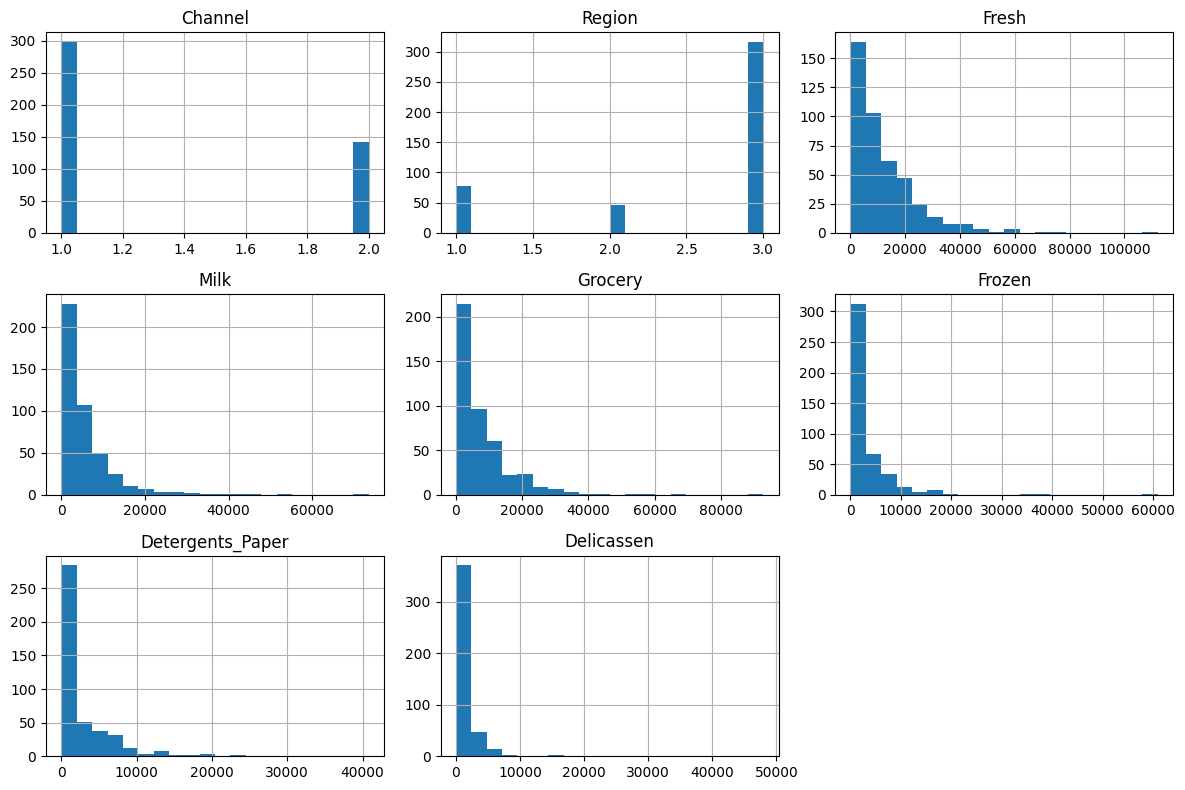

In [ ]:
# Histogram Plot
data.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

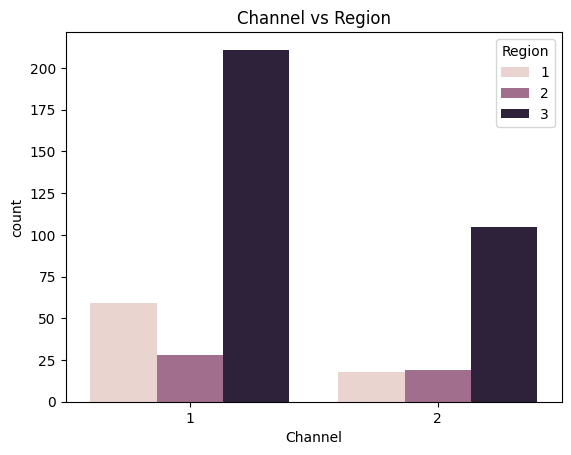

In [ ]:
# Count plot for Channel and Region
sns.countplot(x='Channel', hue='Region', data=data)
plt.title('Channel vs Region')
plt.show()

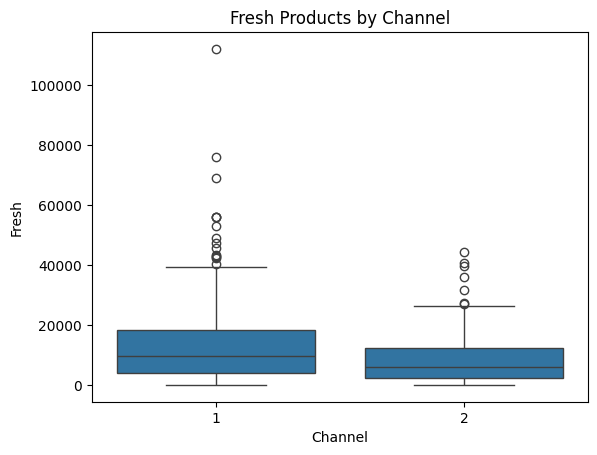

In [ ]:
# Boxplot - Fresh by Channel
sns.boxplot(x='Channel', y='Fresh', data=data)
plt.title('Fresh Products by Channel')
plt.show()

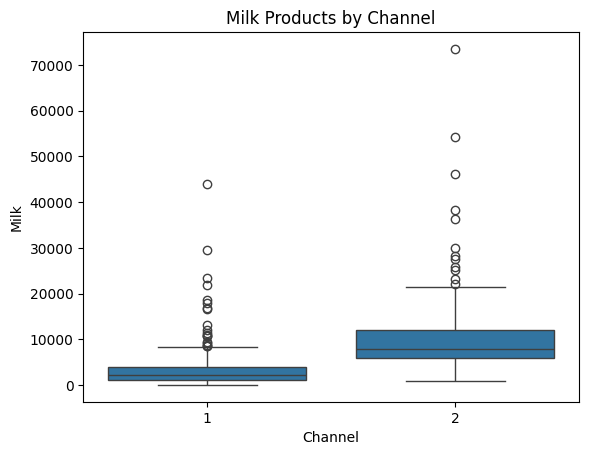

In [ ]:
# Boxplot - Milk by Channel
sns.boxplot(x='Channel', y='Milk', data=data)
plt.title('Milk Products by Channel')
plt.show()

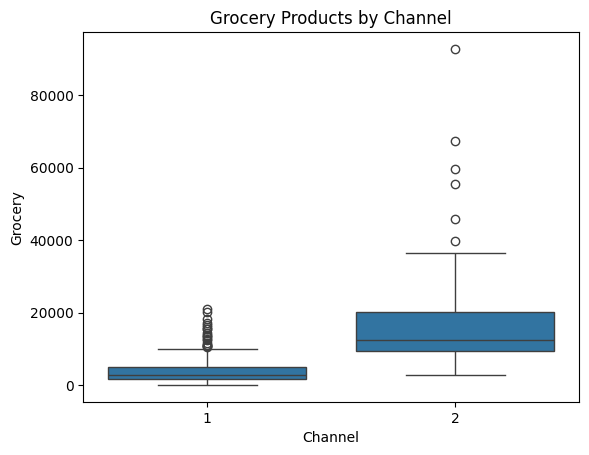

In [ ]:
# Boxplot - Grocery by Channel
sns.boxplot(x='Channel', y='Grocery', data=data)
plt.title('Grocery Products by Channel')
plt.show()

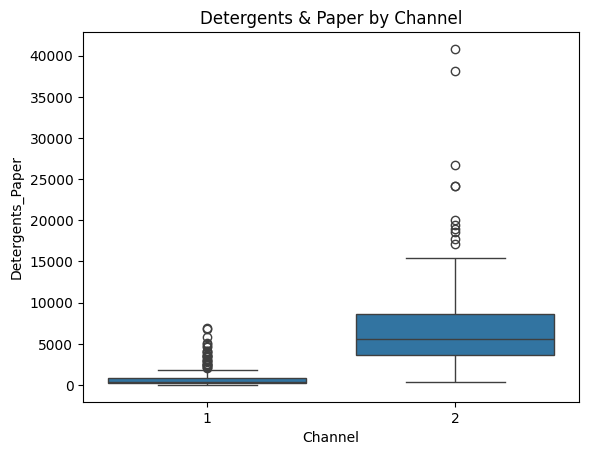

In [ ]:
# Boxplot - Detergents_Paper by Channel
sns.boxplot(x='Channel', y='Detergents_Paper', data=data)
plt.title('Detergents & Paper by Channel')
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = numeric_data.corr()

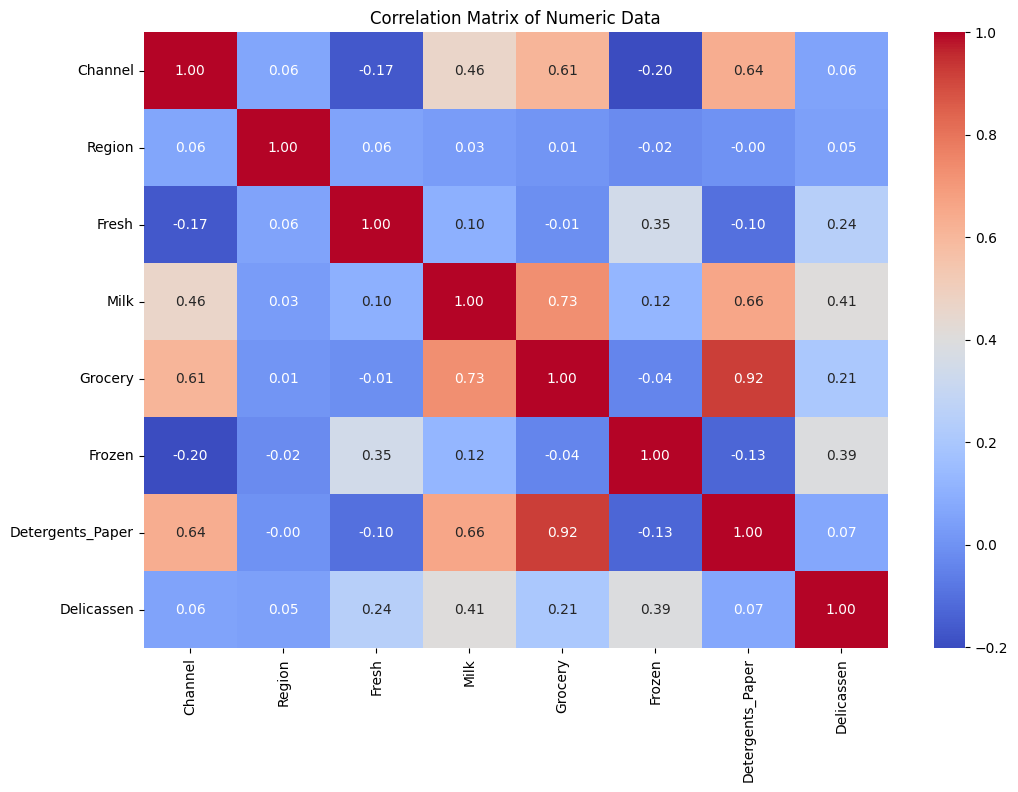

In [ ]:
# Plotting the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Data')
plt.show()

In [ ]:
# Treatment for missing values
missing_values = data.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
# Check duplicates
duplicates = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Variance
variance = numeric_data.var()
print(f"Variance:\n{variance}")

Variance:
Channel             2.190723e-01
Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
dtype: float64


In [ ]:
# Treatment for outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filter out the outliers
data_no_outliers = data_cleaned[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Number of rows after outlier removal: {data_no_outliers.shape[0]}")

Number of rows after outlier removal: 332


In [ ]:
# Scaling the numeric data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_no_outliers.select_dtypes(include=[np.number]))

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_no_outliers.select_dtypes(include=[np.number]).columns)